<a href="https://colab.research.google.com/github/Bappy60/ML_Assignment/blob/main/Contour%20Plot/contour_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Author Name : Kawsar Ahemmed Bappy*

*Registration Number : 2018831060*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install google-colab
import google.colab.drive as drive

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
file_path = '/content/drive/My Drive/Uni_linear.txt'

# Read the CSV file
data = pd.read_csv(file_path, header=None)

In [14]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [15]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


#Plotting Data

Text(0.5, 1.0, 'Profit Prediction')

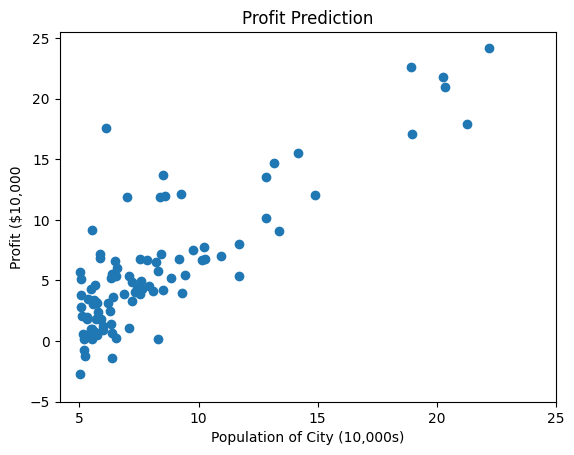

In [16]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Prediction")

#Compute The Cost Function

In [17]:
def computeCost(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2

    return 1/(2*m) * np.sum(square_err)

In [18]:
data_n=data.values
m=data_n[:,0].size
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))

computeCost(X,y,theta)

32.072733877455676

#Gradient Descent

In [19]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]

    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))

    return theta, J_history

In [20]:
theta,J_history = gradientDescent(X,y,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.63 + 1.17x1


In [21]:
from mpl_toolkits.mplot3d import Axes3D

In [22]:
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

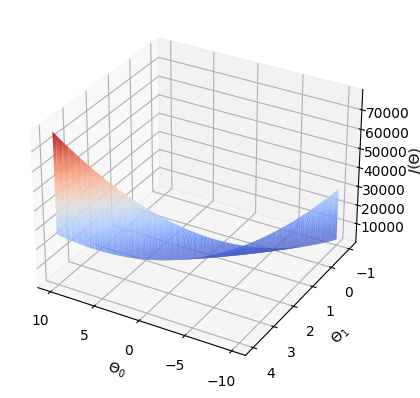

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")

ax.set_xlabel("$\Theta_0$",fontsize=10)
ax.set_ylabel("$\Theta_1$",fontsize=10)
ax.set_zlabel("$J(\Theta)$",fontsize=10)

ax.view_init(30,120)

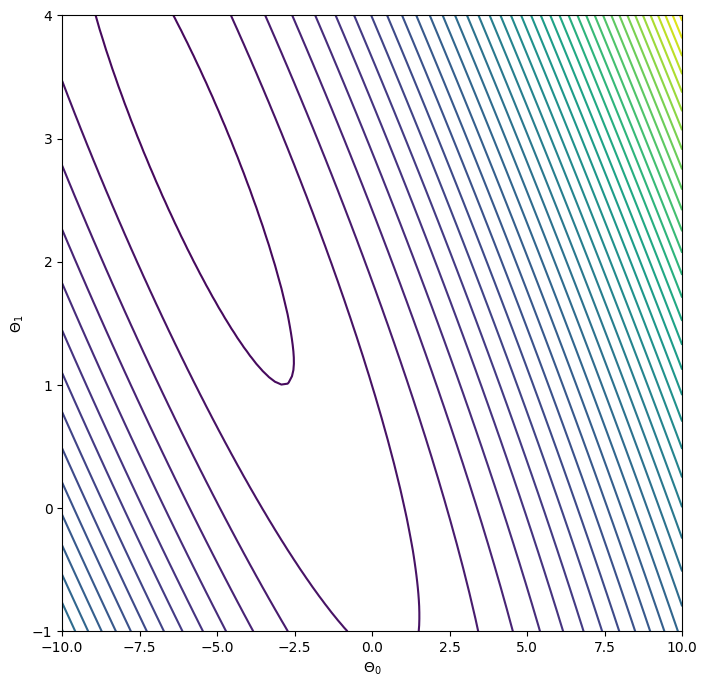

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contour(theta0_vals,theta1_vals,J_vals, levels=50)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
plt.show()